## Import the necessary libraries

In [0]:
### Import all required packages

## for performing basic math operations
import numpy as np

## for loading and handling data
import pandas as pd

## for getting critical values(isf) and p-value(cdf)
import scipy.stats as stats

## for splitting data
from sklearn.model_selection import train_test_split

## for scaling the data
from sklearn.preprocessing import StandardScaler

## for finding the accuracy score and to analyse the confusion matrix
from sklearn import metrics

## for visualizations and plotting of data
from matplotlib import pyplot as plt

#  for more beautification
import seaborn as sns

## to handle warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import copy

2. Read the data as a data frame

In [0]:
insurance_df_raw = pd.read_csv('https://raw.githubusercontent.com/GreatLearningAIML1/bangalore-aug19-batch-knightriderX/master/StatisticalLearning/Project2/insurance.csv?token=ABRYHIYORTBPVWDMAZRXKK26FA7J6') # Reading the data set

3. Perform basic EDA which should include the following
and print out your insights at every step.

In [4]:
insurance_df_raw.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_df_raw.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
insurance_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


3a. Shape of the data

In [7]:
insurance_df_raw.shape

(1338, 7)

There are 1338 rows, 7 columns in this dataset.

3b. Data type of each attribute

In [8]:
insurance_df_raw.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

there seem to be varied types of values in the dataset

3c. Checking the presence of missing values

In [9]:
insurance_df_raw.isna().apply(pd.value_counts)

,age,sex,bmi,children,smoker,region,charges
False,1338,1338,1338,1338,1338,1338,1338


there doesn't seem to be any missing values in the data set

3d. 5 point summary of numerical attributes

In [23]:
insurance_df_raw.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

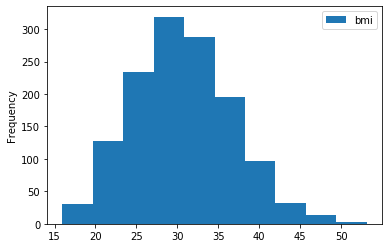

In [28]:
insurance_df_raw['bmi'].plot(kind='hist',legend=True)

BMI is normally distributed!

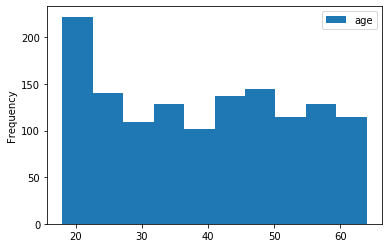

In [26]:
insurance_df_raw['age'].plot(kind='hist',legend=True)

Age is right-skewed, but not so-much

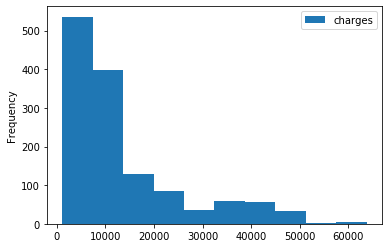

In [27]:
insurance_df_raw['charges'].plot(kind='hist',legend=True)

Charges are right-skewed!

3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’
columns

In [29]:
Skewness = pd.DataFrame({'skewness' : [stats.skew(insurance_df_raw.bmi),stats.skew(insurance_df_raw.age),stats.skew(insurance_df_raw.charges)]},
                        index=['bmi','age','charges']) 
Skewness

,skewness
bmi,0.283729
age,0.055610
charges,1.514180


3g. Checking the presence of outliers in ‘bmi’, ‘age’ and
‘charges columns

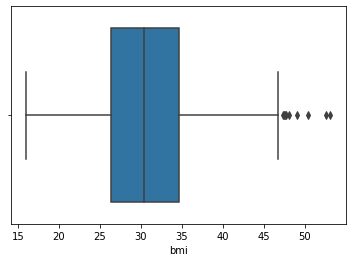

In [30]:

sns.boxplot(insurance_df_raw.bmi)

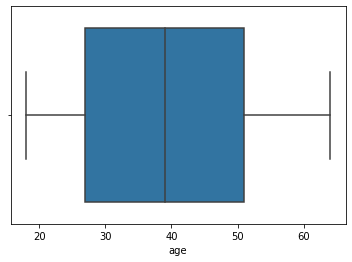

In [31]:
sns.boxplot(insurance_df_raw.age)

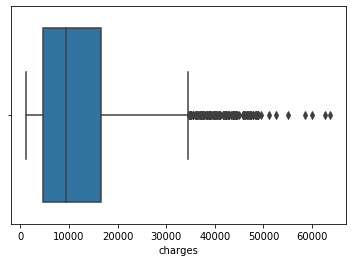

In [32]:
sns.boxplot(insurance_df_raw.charges)

3h. Distribution of categorical columns (include
children)

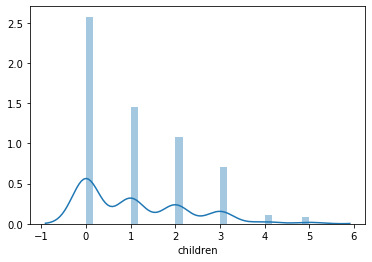

In [37]:
sns.distplot(insurance_df_raw['children'],bins=30)

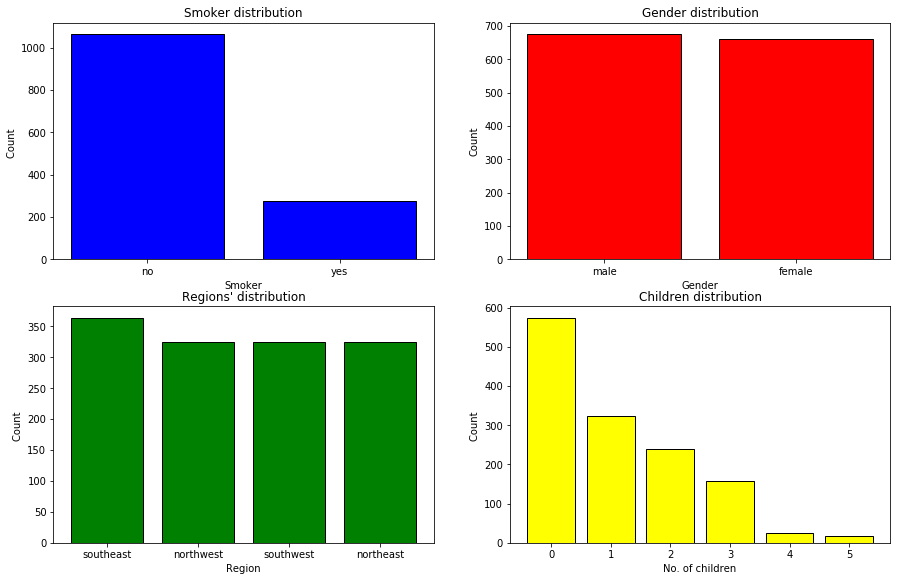

In [49]:
plt.figure(figsize=(15,20))

x = insurance_df_raw.smoker.value_counts().index    
y = [insurance_df_raw['smoker'].value_counts()[i] for i in x]   

plt.subplot(4,2,1)
plt.bar(x,y, align='center',color = 'blue',edgecolor = 'black')  
plt.xlabel('Smoker')
plt.ylabel('Count ')
plt.title('Smoker distribution')

x1 = insurance_df_raw.sex.value_counts().index   
y1 = [insurance_df_raw['sex'].value_counts()[j] for j in x1]   
plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'red',edgecolor = 'black')  
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender distribution')

x2 = insurance_df_raw.region.value_counts().index   
y2 = [insurance_df_raw['region'].value_counts()[k] for k in x2]   

plt.subplot(4,2,3)
plt.bar(x2,y2, align='center',color = 'green',edgecolor = 'black')  
plt.xlabel('Region')
plt.ylabel('Count ')
plt.title("Regions' distribution")

x3 = insurance_df_raw.children.value_counts().index    
y3 = [insurance_df_raw['children'].value_counts()[l] for l in x3]   

plt.subplot(4,2,4)
plt.bar(x3,y3, align='center',color = 'yellow',edgecolor = 'black')  
plt.xlabel('No. of children')
plt.ylabel('Count ')
plt.title("Children distribution")

plt.show()


3i. Pair plot that includes all the columns of the data
frame

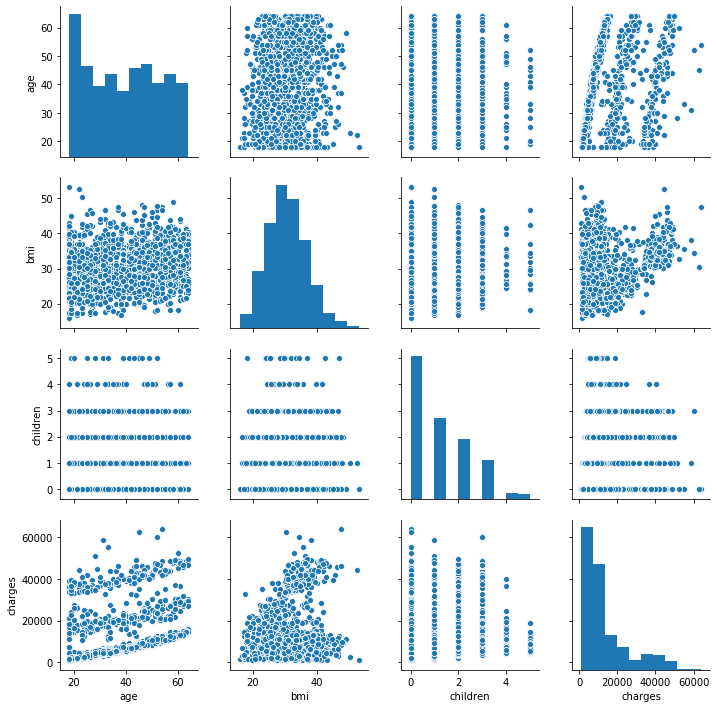

In [53]:
sns.pairplot(insurance_df_raw)

4a. Do charges of people who smoke differ significantly from the people who don't?

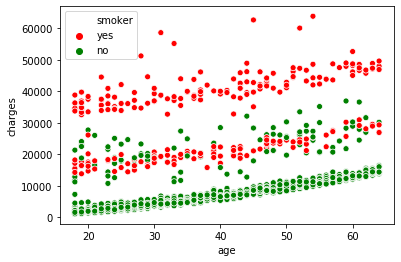

In [54]:
sns.scatterplot(insurance_df_raw.age, insurance_df_raw.charges,hue=insurance_df_raw.smoker,palette= ['red','green'] )

That seems the case, but the data spread indicates that there are smokers who are less than 20 years old that also have high charges.
Overall, the charges significantly differ for smokers versus non-smokers.

In [55]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array(insurance_df_raw[insurance_df_raw.smoker == 'yes'].charges)  # Selecting charges corresponding to smokers as an array
y = np.array(insurance_df_raw[insurance_df_raw.smoker == 'no'].charges) # Selecting charges corresponding to non-smokers as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are not the same as the p_value (8.271435842177219e-283) < 0.05


4b. Does bmi of males differ significantly from that of females?

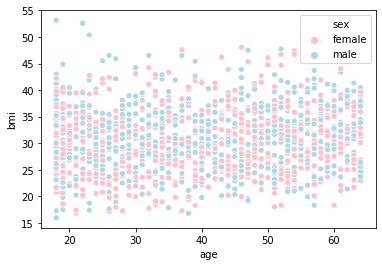

In [57]:
sns.scatterplot(insurance_df_raw.age, insurance_df_raw.bmi,hue=insurance_df_raw.sex,palette= ['pink','lightblue'] )

In [58]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"   # Stating the Alternate Hypothesis

x = np.array(insurance_df_raw[insurance_df_raw.sex == 'male'].bmi)  # Selecting bmi values corresponding to males as an array
y = np.array(insurance_df_raw[insurance_df_raw.sex == 'female'].bmi) # Selecting bmi values corresponding to females as an array

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


Seems like BMI doesn't differ for males and females

4c. Is the proportion of smokers significantly different in different genders?

In [59]:
# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df_raw['sex'],insurance_df_raw['smoker'])  # Contingency table of sex and smoker attributes

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


4d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [61]:
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(insurance_df_raw[insurance_df_raw['sex'] == 'female'])

zero = female_df[female_df.children == 0]['bmi']
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.716) > 0.05
